NumPy可以通过通用函数的向量化操作来减少Python的缓慢循环，另一种向量化的方法就是Python的**广播**功能。
广播可以理解为用于不同大小的二元通用函数（加、减、乘等）的一组规则
# 1.广播的介绍

In [1]:
import numpy as np

In [2]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

广播允许这些二元运算符可以用于不同大小的数组。例如简单的一个标量和一个数组的相加<br>
我们可以认为是将数值5扩展或重复至数组\[5,5,5\]，然后执行加法<br>
浅色表示广播的值。
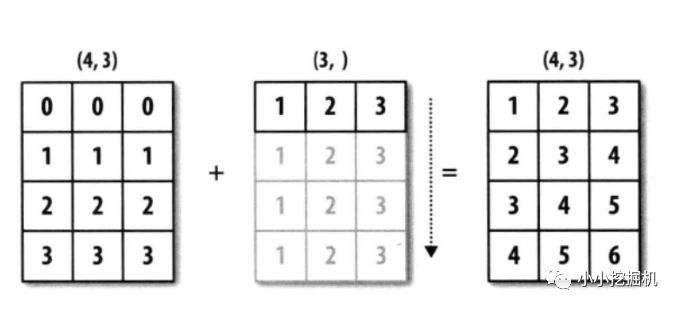

In [3]:
a + 5

array([5, 6, 7])

In [4]:
np.ones((3,3)) + np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

也可以两个数组同时广播

In [5]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis] #获取列
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [6]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# 2.广播的规则
- 规则1：如果两个数组的维度不相同，那么小维度数组的形状将会在最左边补1。
- 规则2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1的维度扩展以匹配另一个数组的形状
- 规则3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，那么会引发异常

**example 1:**

In [7]:
M = np.ones((2,3))
a = np.arange(3)
print("M = ",M)
print("a = ",a)

M =  [[1. 1. 1.]
 [1. 1. 1.]]
a =  [0 1 2]


In [8]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

**example 2:**

In [9]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print("a = ",a)
print("b = ",b)

a =  [[0]
 [1]
 [2]]
b =  [0 1 2]


In [10]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

**example 3:**

In [11]:
M = np.ones((3,2))
a = np.arange(3)
print("M = ",M)
print("a = ",a)

# M + a会报错

M =  [[1. 1.]
 [1. 1.]
 [1. 1.]]
a =  [0 1 2]


In [12]:
a[:,np.newaxis].shape

(3, 1)

In [13]:
M + a[:,np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

# 广播的应用实例
## 1.数组的归一化

In [14]:
X= np.random.random((10,3))

In [15]:
Xmean = X.mean(0)

In [16]:
Xmean

array([0.55520986, 0.41033341, 0.46912055])

In [17]:
#现在通过X中的元素都减去这个均值实现归一化（该操作是一个广播操作）
X_centered = X - Xmean

In [18]:
X_centered.mean(0)

array([5.55111512e-17, 4.44089210e-17, 5.55111512e-17])

## 2.画一个二维函数
定义一个函数z(x,y),可以用广播沿着数值区间计算该函数

In [19]:
#x和y表示0-5区间50个步长的序列
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y*x)*np.cos(x)

In [20]:
import matplotlib.pyplot as plt

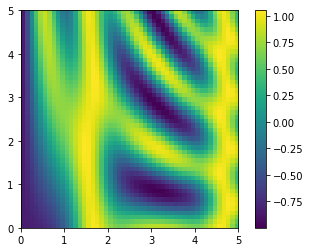

In [21]:
plt.imshow(z,origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar();